![](https://7612750.fs1.hubspotusercontent-na1.net/hubfs/7612750/logo%20Senpai_2022%20(1)-1.png)
# Proyecto final - Bootcamp Data Science

A continuación, se detallan las indicaciones para el desarrollo del proyecto final. 
Tenga a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El proyecto se realiza de forma grupal comenzando el 21 de Noviembre a las 7:00 PM. La defensa del mismo se realizará el día 1 de diciembre a las 7:00 PM. Como parte de la evaluación se ponderan tres conceptos, el desarrollo de la solución (Notebook), la defensa grupal y la presentación individual 

2. La fecha de entrega de trabajo es el 30 de Noviembre a las 9:00 AM horas 

3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato **.ipynb**

4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Colab, Spypder o VSCodium, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3.

5. Como parte del ejercicio, se podrán implementar todas las herramientas y code snippets vistos durante el transcurso del bootcamp.

6. Se deberan implementar funciones que reciban los parámetros adecuados y no posean strings implícitos dentro de la misma función.

7. Los trabajos deberán ser enviados por correo al cuerpo docente (1 por grupo).

8. Se deben de implementar visualizaciones, ya sea como parte del EDA y/o del entrenamiento del modelo

9. Se recomienda trabajar con Colab o Kaggle para el desarrollo del proyecto. Tenga en cuenta que cada servicio posee particularidades con las versiones de las librerías con las que opera.

10. Con el objetivo de poder registrar los experimentos y sus métricas, se recomienda utilizar soluciones de MLOps como Neptune, Tensorboard, o Comet.

---

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre  | Apellido
--------|----------
Alumno  | 1
Alumno  | 2
Alumno  | 3


## Criterio de evaluación

Cada grupo deberá proponer al menos dos temas los cuales serán evaluados por los docentes en base a los siguientes parámetros:

- Complejidad
- Usabilidad
- Aplicabilidad
- Innovador

Una vez que el cuerpo docente haya dado la aprobación de uno de los temas propuestos por el equipo, el mismo deberá comenzar con el desarrollo del modelo predictivo aplicando los conocimientos vistos a través del bootcamp.

Como parte del examen se evaluarán los siguientes conceptos:

* Importar datos desde fuentes externas
* Uso de funciones
* Documentación
* Limpieza de datos
* Gestión de datos y transformaciones
* Visualizaciones
* Selección de atributos
* Reducción de dimensionalidad donde sea neceario
* Modelado
* Evaluación de los resultados (métricas)
* Almacenamiento de resultados y modelo


Tenga en cuenta que el desarrollo no solo debe contar con la documentación de código como parte de las buenas prácticas, sino que también se debe documentar los diferentes resultados parciales con su debida explicación, así como la conclusión con los datos que soporten los resultados

## Herramientas utilizadas

A continuación tenga a bien detallar las herramientas utilizadas para el desarrollo del proyecto, incluyendo Notebooks, herramientas de visualización, Librerías principales, y software adicional (e.g. documentación, MLOps, etc)

*   Google Colab
*   PowerPoint

---

# Clases y funciones

En el siguiente apartado se recomienda definir las clases/funciones/funciones lambdas aplicables al desarrollo. Esto permitirá tener organizado la declaración de las mismas así como la actualización.

>Note: Todas las clases/funciones deben poseer la documentación correspondiente de los parámetros que recibe, argumentos, y salida de las mismas

In [1]:
seed = 42
ruta_directorio_original = '/kaggle/input/Original'

Plan a seguir 

1- Carga de datos
2- Mostrar imagenes
3- Normalizar- preprocesamiento
4- Data augmentation
5- Train/val/split 
6- Plantear modelo cnn
7- Entrenar 
8- Evaluacion
9- Grad-cam
10- Comparar grad-cam con imagnes sedmentadas


## Carga de datos

In [2]:
pip install neptune

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install neptune-tensorflow-keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tf-explain --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from random import sample
import albumentations as A
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, SparseCategoricalAccuracy
import neptune
from neptune.integrations.tensorflow_keras import NeptuneCallback
from neptune.types import File
from tf_explain.core import GradCAM


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#Init Neptune
run = neptune.init_run(
        project="joacodominguez/proyecto-final",
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3M2Y4OGJkNC00ZjlmLTQ5MmUtYTg5YS1mMGEzMjEzZmE3Y2QifQ==", # your credentials
)

/tmp/ipykernel_1640/1370018694.py:2: NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/
  run = neptune.init_run(


https://app.neptune.ai/joacodominguez/proyecto-final/e/PROY-27


In [7]:
model_version = neptune.init_model_version(
    model="PROY-PROY",
    project="joacodominguez/proyecto-final",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI3M2Y4OGJkNC00ZjlmLTQ5MmUtYTg5YS1mMGEzMjEzZmE3Y2QifQ==", # your credentials
)

https://app.neptune.ai/joacodominguez/proyecto-final/m/PROY-PROY/v/PROY-PROY-5


In [8]:
os.chdir('/kaggle/input/Original')
print(os.listdir())

def count_files(folder_names = []):
    for f_name in folder_names:
        count = len(os.listdir(f'{f_name}'))
        print(f'Folder: {f_name} contains {count} images')
        
count_files(['Benign', 'Early', 'Pre', 'Pro'])

['Pro', 'Pre', 'Benign', 'Early']
Folder: Benign contains 504 images
Folder: Early contains 985 images
Folder: Pre contains 963 images
Folder: Pro contains 804 images


In [9]:
subcarpeta = ['Benign', 'Early', 'Pre', 'Pro']  # Asumo que esta es tu lista de subcarpetas

unique_dimensions = set()

for sub in subcarpeta:
    folder_path = os.path.join(ruta_directorio_original, sub)

    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file)
        with Image.open(image_path) as img:
            unique_dimensions.add(img.size)

if len(unique_dimensions) == 1:
    print(f"\nTodas las imágenes tienen las mismas dimensiones: {unique_dimensions.pop()}")
else:
    print(f"\nSe encontraron {len(unique_dimensions)} dimensiones únicas de imágenes: {unique_dimensions}")


Todas las imágenes tienen las mismas dimensiones: (224, 224)


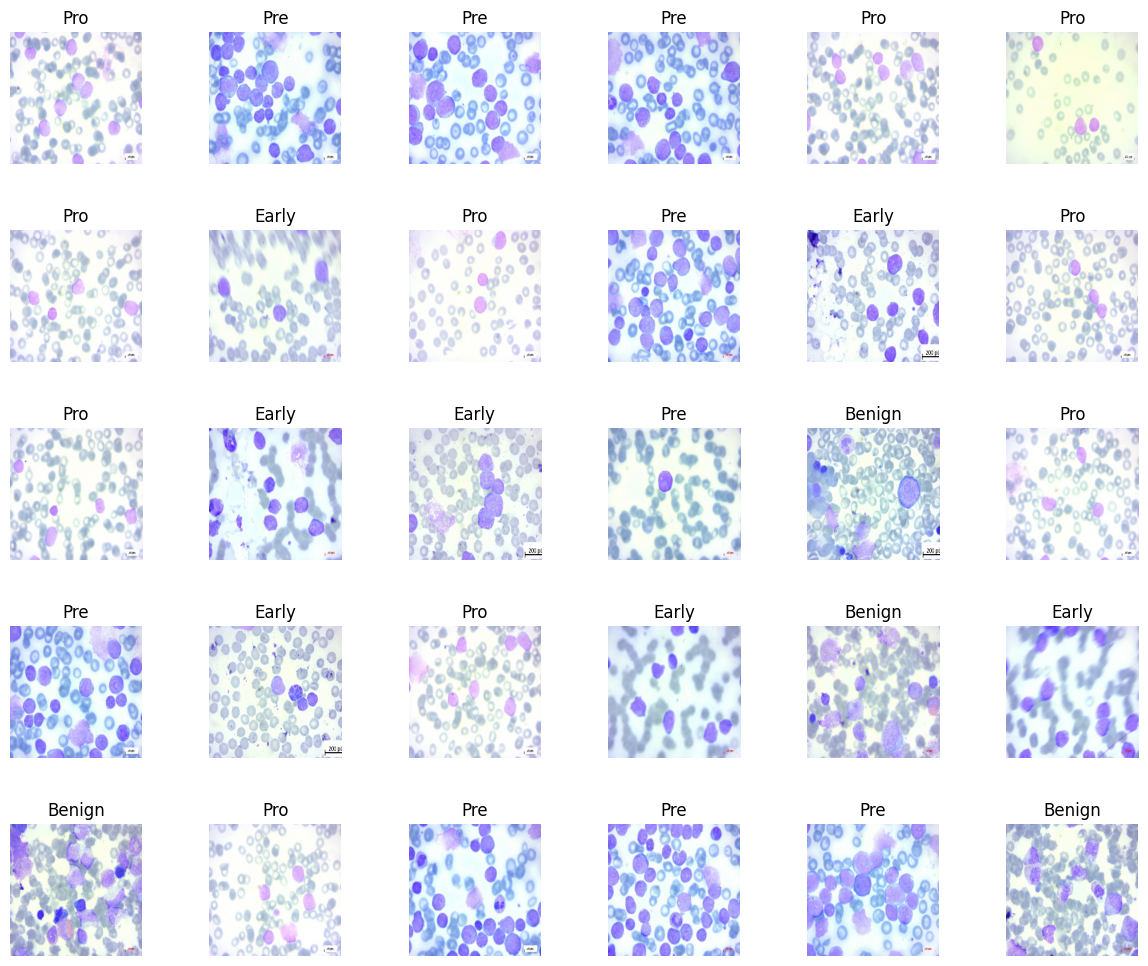

In [10]:
# Inicializa una lista para almacenar nombres de archivos de todas las subcarpetas
nombres_archivos = []

# Itera sobre las subcarpetas y obtén los nombres de archivos
for subcarpeta in os.listdir(ruta_directorio_original):
    ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)
    if os.path.isdir(ruta_subcarpeta):
        nombres_archivos.extend(os.listdir(ruta_subcarpeta))

# Asegúrate de que haya al menos 30 imágenes disponibles
if len(nombres_archivos) >= 30:
    # Selecciona al azar 30 imágenes de la lista
    imagenes_ejemplo = sample(nombres_archivos, 30)

# Configura el diseño de la figura
    filas, columnas = 5, 6
    figura, ejes = plt.subplots(filas, columnas, figsize=(15, 12))
    figura.subplots_adjust(hspace=0.5)

    # Itera sobre las imágenes de ejemplo y muéstralas en la cuadrícula
    for i, nombre_archivo in enumerate(imagenes_ejemplo):
        # Itera sobre las subcarpetas para encontrar la imagen
        for subcarpeta in os.listdir(ruta_directorio_original):
            ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)
            ruta_imagen = os.path.join(ruta_subcarpeta, nombre_archivo)
            
            if os.path.isfile(ruta_imagen):
                imagen = cv.imread(ruta_imagen)
                imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar con matplotlib
                ejes[i // columnas, i % columnas].imshow(imagen)
                ejes[i // columnas, i % columnas].axis('off')
                ejes[i // columnas, i % columnas].set_title(subcarpeta)
                break  # Rompe el bucle una vez que se encuentra la imagen

    plt.show()
else:
    print("No hay suficientes imágenes en las subcarpetas para mostrar 30 ejemplos.")

## Normalizacion y preprocesamiento

In [11]:
def preprocessor(image):
    # Applying normalization to the image
    image = cv.normalize(image, None, 0, 255, cv.NORM_MINMAX)    
    
    image = np.array(image)/255.0
    return image

## MODELADO, Train/Test/Split



In [14]:
all_data = []

# Crear un diccionario con el nombre de la subcarpeta y su índice
label_mapping = {subcarpeta: i for i, subcarpeta in enumerate(subcarpetas)}

# Itera sobre cada subcarpeta
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)

    # Asegúrate de que sea una subcarpeta y no un archivo
    if os.path.isdir(ruta_subcarpeta):
        # Itera sobre cada imagen en la subcarpeta
        for nombre_archivo in os.listdir(ruta_subcarpeta):
            ruta_imagen = os.path.join(ruta_subcarpeta, nombre_archivo)

            # Asegúrate de que sea un archivo y no una subcarpeta
            if os.path.isfile(ruta_imagen):
                # Lee la imagen
                imagen = cv.imread(ruta_imagen)
                imagen = cv.resize(imagen, (224, 224)) / 255.0
                
                # Mapeo de la etiqueta a valor numérico usando el diccionario label_mapping
                etiqueta = label_mapping[subcarpeta]

                all_data.append([imagen, etiqueta])

In [15]:
# Convertir la lista a arrays de Numpy
x = np.array(img_matrix_list)
y = np.array([label_mapping[etiqueta] for etiqueta in etiquetas_list])

# Realizar la división entre conjuntos de entrenamiento, prueba y validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

# Dividir adicionalmente el conjunto de entrenamiento en un conjunto de validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=seed)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(18754, 224, 224, 3) (5210, 224, 224, 3) (2084, 224, 224, 3) (18754,) (5210,) (2084,)


## Data augmentation (albumentation)

In [12]:
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title=""):
    fig, axis = plt.subplots(figsize=(15, 8), nrows=2, ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize=18)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)

    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        axis[i // ncols][i % ncols].imshow(img)
        axis[i // ncols][i % ncols].set_title(title, fontsize=15)

    plt.show()

/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


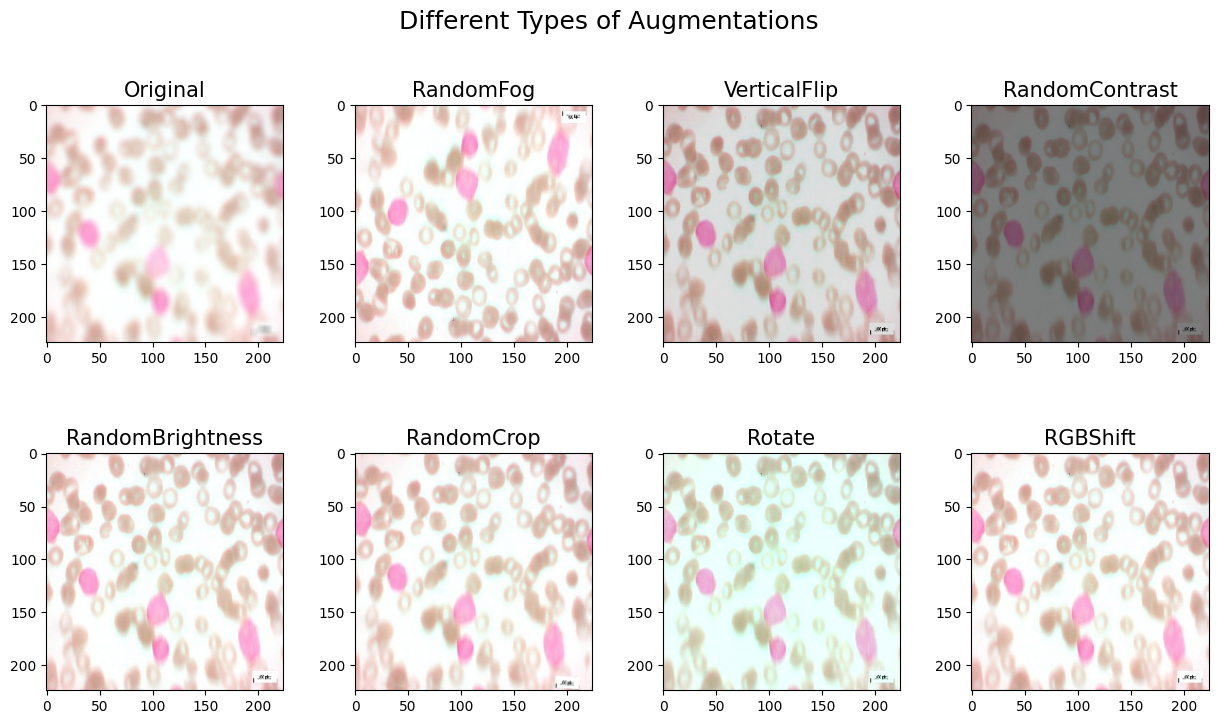

In [13]:
# Definir la lista de transformaciones de Albumentations
albumentation_list = [
    A.RandomFog(p=1),
    A.VerticalFlip(p=1),
    A.RandomBrightness(p=1),
    A.RandomContrast(limit=0.6, p=1),
    A.RandomCrop(p=1, height=224, width=224),
    A.Rotate(p=1, limit=90),
    A.RGBShift(p=1)
]

# Obtener la lista de nombres de subcarpetas (clases)
subcarpetas = os.listdir(ruta_directorio_original)

# Lista para almacenar las imágenes originales y augmentadas
img_matrix_list = []
etiquetas_list =[]

# Iterar sobre cada subcarpeta
for subcarpeta in subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)

    # Asegurarse de que sea una subcarpeta y no un archivo
    if os.path.isdir(ruta_subcarpeta):
        # Iterar sobre cada imagen en la subcarpeta
        for nombre_archivo in os.listdir(ruta_subcarpeta):
            ruta_imagen = os.path.join(ruta_subcarpeta, nombre_archivo)

            # Asegurarse de que sea un archivo y no una subcarpeta
            if os.path.isfile(ruta_imagen):
                # Leer la imagen original
                chosen_image = cv.imread(ruta_imagen)

                # Aplicar augmentations y almacenar las imágenes
                for aug_type in albumentation_list:
                    augmented_img = aug_type(image=chosen_image)['image']
                    img_matrix_list.append(augmented_img)
                    etiquetas_list.append(subcarpeta)

                img_matrix_list.append(chosen_image)  # Agregar la imagen original
                etiquetas_list.append(subcarpeta)
# Títulos para las imágenes
titles_list = ["Original", "RandomFog", "VerticalFlip", "RandomContrast", "RandomBrightness", "RandomCrop", "Rotate", "RGBShift"]

# Mostrar las imágenes en una cuadrícula
plot_multiple_img(img_matrix_list, titles_list, ncols=4, main_title="Different Types of Augmentations")

## Desarrollo de la Arquitectura CNN


In [16]:
tf.keras.utils.set_random_seed(seed)

In [17]:
# Define el modelo
modelo = Sequential()
modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),padding = 'same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))  # Agrega Dropout con una tasa del 50% (ajusta según sea necesario)
modelo.add(Dense(4, activation='softmax')) 

In [18]:
modelo.compile(optimizer='Adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

In [19]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

## Definiendo Callbacks

In [20]:
# Neptune parameters
parameters = {"dense_units": 4,
              "activation": "relu",
              "batch_size": 64,
              "n_epochs": 20
              }

run["model/parameters"] = parameters

In [42]:
callbacks = [
    EarlyStopping(monitor='recall', min_delta=0, patience=8, mode='auto'),
    ModelCheckpoint('best_model2.h5', monitor='val_recall', save_best_only=True),
    NeptuneCallback(run=run)
]

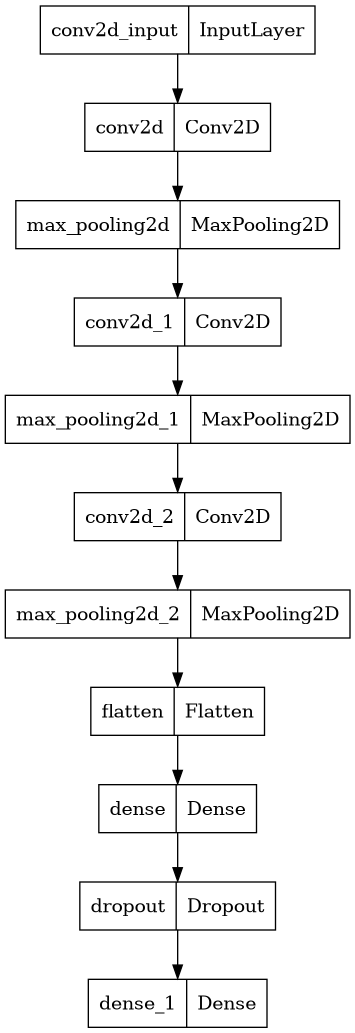

In [22]:
plot_model(modelo, to_file='/kaggle/working/cnn.png')

In [23]:
history = modelo.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)  # Sin envolver en otra lista

Epoch 1/20
294/294 [==============================] - 30s 82ms/step - loss: 3.3118 - sparse_categorical_accuracy: 0.6891 - val_loss: 0.4517 - val_sparse_categorical_accuracy: 0.8297
Epoch 2/20
294/294 [==============================] - 23s 77ms/step - loss: 0.4652 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.3022 - val_sparse_categorical_accuracy: 0.8772
Epoch 3/20
294/294 [==============================] - 23s 78ms/step - loss: 0.3286 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.2127 - val_sparse_categorical_accuracy: 0.9223
Epoch 4/20
294/294 [==============================] - 23s 78ms/step - loss: 0.2633 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.1817 - val_sparse_categorical_accuracy: 0.9381
Epoch 5/20
294/294 [==============================] - 23s 79ms/step - loss: 0.1743 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8728
Epoch 6/20
294/294 [==============================] - 23s 79ms/step - loss: 0.1697 - spars

## Evaluación del modelo

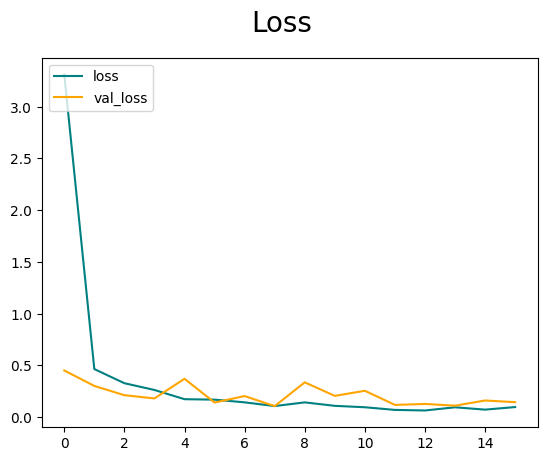

In [24]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

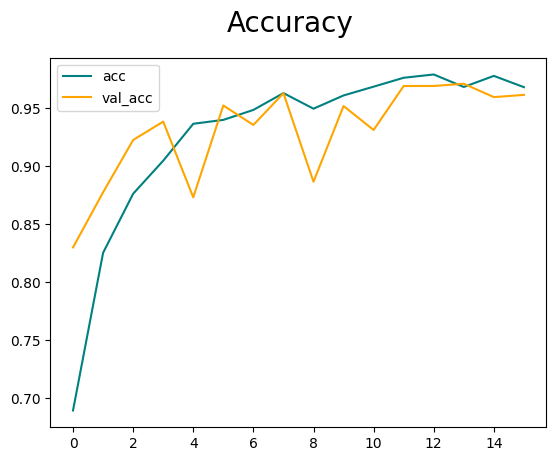

In [25]:
fig = plt.figure()
plt.plot(history.history['sparse_categorical_accuracy'], color='teal', label='acc')
plt.plot(history.history['val_sparse_categorical_accuracy'], color='orange', label='val_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
modelo.save('/kaggle/working/cnn_model.h5')
#model_resnet.save('/kaggle/working/resnet_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
test_loss, test_accuracy = modelo.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}')

163/163 [==============================] - 3s 16ms/step - loss: 0.1541 - sparse_categorical_accuracy: 0.9597
Test accuracy: 0.96, Test loss: 0.15


In [28]:
"""run["evaluation/accuracy"] = test_accuracy
run["evaluation/loss"] = test_loss
model_version["model"].upload("best_model.h5") """

'run["evaluation/accuracy"] = test_accuracy\nrun["evaluation/loss"] = test_loss\nmodel_version["model"].upload("best_model.h5") '

163/163 [==============================] - 2s 12ms/step


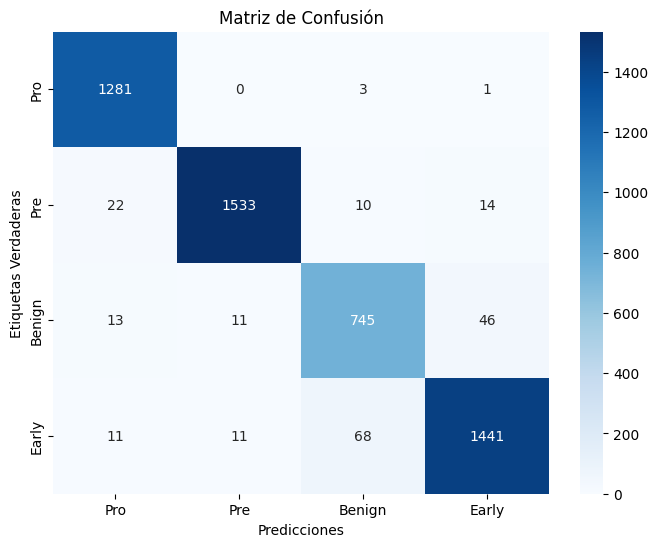

              precision    recall  f1-score   support

         Pro       0.97      1.00      0.98      1285
         Pre       0.99      0.97      0.98      1579
      Benign       0.90      0.91      0.91       815
       Early       0.96      0.94      0.95      1531

    accuracy                           0.96      5210
   macro avg       0.95      0.96      0.95      5210
weighted avg       0.96      0.96      0.96      5210



In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Obtener predicciones en el conjunto de prueba
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=subcarpetas, yticklabels=subcarpetas)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_classes, target_names=subcarpetas))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

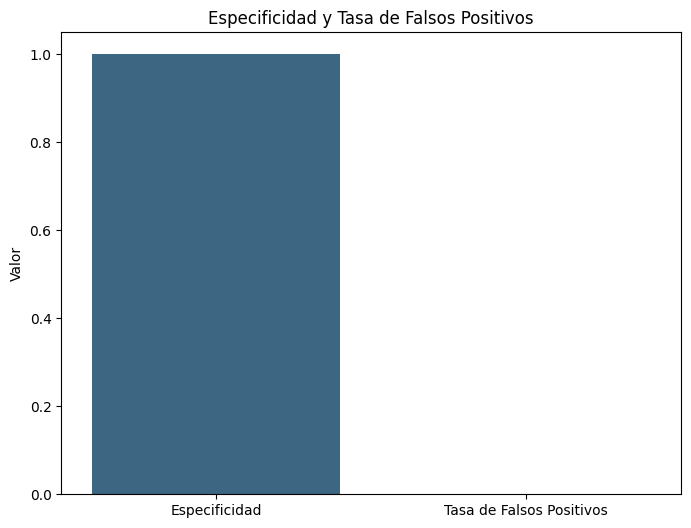

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular métricas
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Visualización
plt.figure(figsize=(8, 6))
sns.barplot(x=['Especificidad', 'Tasa de Falsos Positivos'], y=[specificity, false_positive_rate], palette="viridis")
plt.title('Especificidad y Tasa de Falsos Positivos')
plt.ylabel('Valor')
plt.show()

163/163 [==============================] - 2s 12ms/step


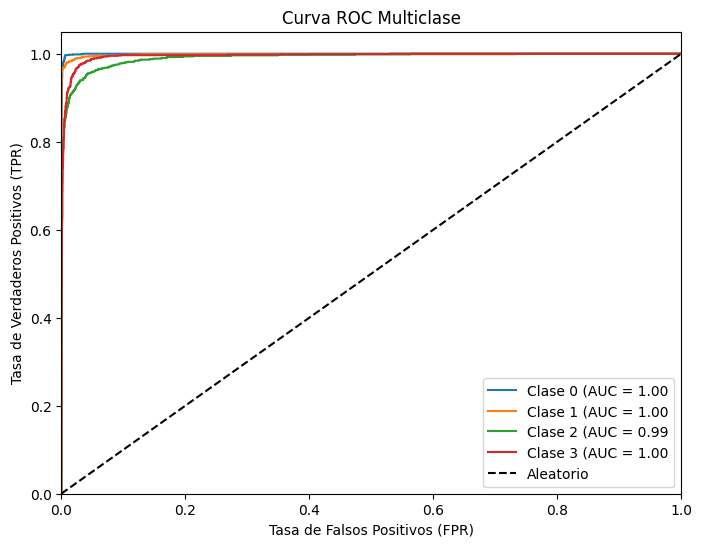

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Obtén las probabilidades predichas para cada clase
y_prob = modelo.predict(x_test)

# Binariza las etiquetas (one-hot encoding)
y_true_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Inicializa las variables para almacenar las tasas TPR y FPR para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcula las tasas TPR y FPR para cada clase
for i in range(4):  # 4 clases en tu caso
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tamaño de la figura
plt.figure(figsize=(8, 6))

# Plotea las curvas ROC para cada clase
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f}')

# Configuración de la figura
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()

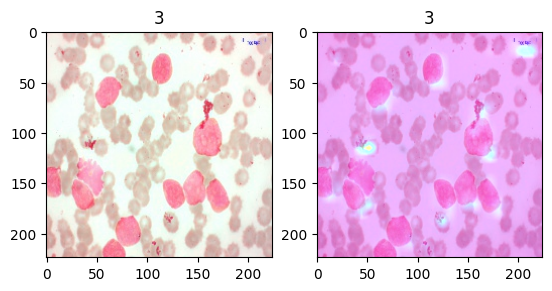

In [36]:
# Instantiation of the explainer - GradCam()
explainer = GradCAM()  # TODO: Asegúrate de que GradCAM esté correctamente definido en tu código

# Obtener la etiqueta (clase) de la imagen
index = 5   # Cambiar '1' por cualquier número entre 0 y len(y_test) - 1
label = int(y_test[index])

# Expandir las dimensiones de la imagen para que coincida con las expectativas de la red
img_to_explain = np.expand_dims(x_test[index], 0)

# Llamada al método explain()
output = explainer.explain(validation_data=[img_to_explain, None],  # Cambié 'validation_data' por [img_to_explain, None]
                           model=modelo, 
                           class_index=label)

# Visualizar la imagen
fig,ax = plt.subplots(1,2)
ax[0].imshow(x_test[index].squeeze())
ax[1].imshow(output)
ax[0].set_title(label)
ax[1].set_title(label)
plt.show()

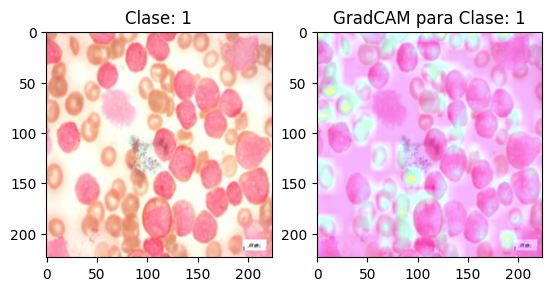

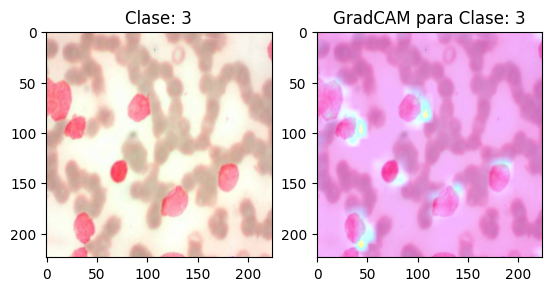

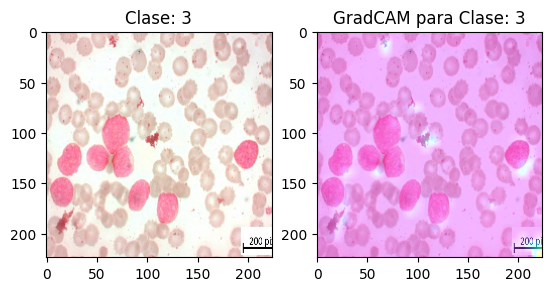

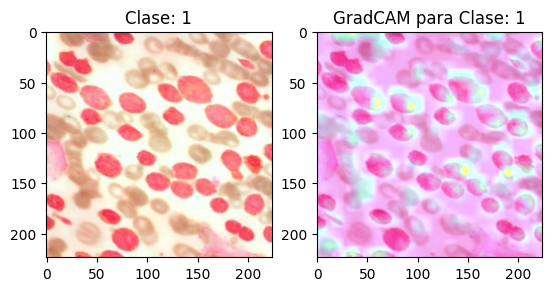

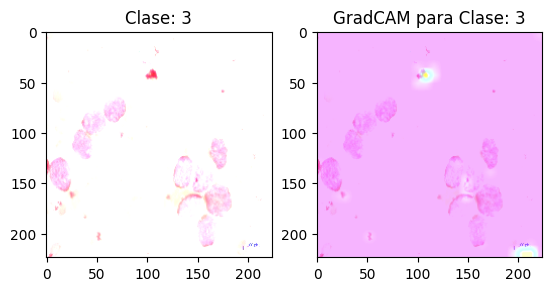

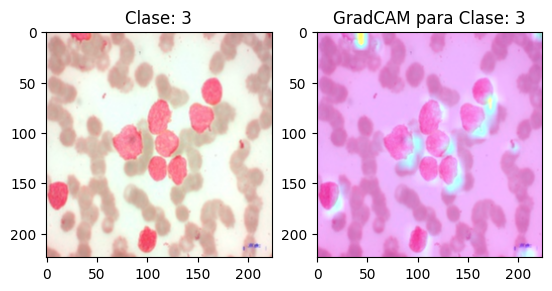

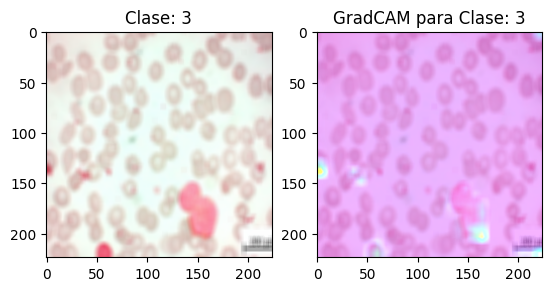

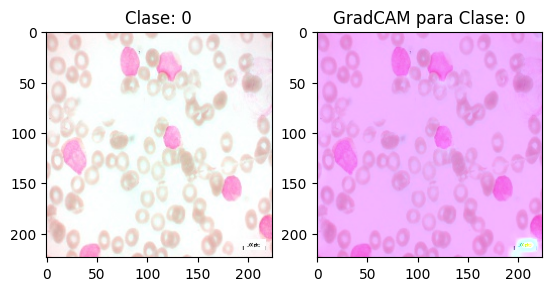

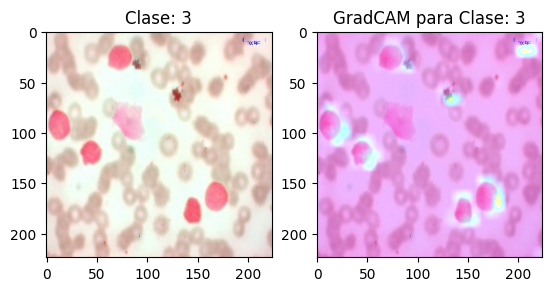

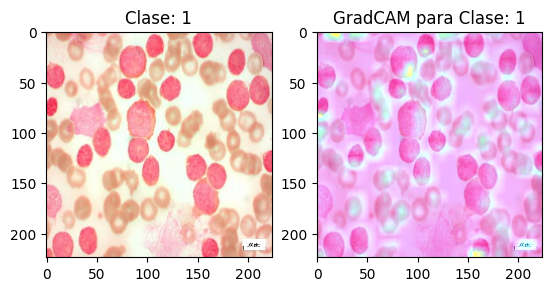

In [37]:
# Instantiation of the explainer - GradCam()
explainer = GradCAM()  # Asegúrate de que GradCAM esté correctamente definido en tu código

# Obtener 10 índices aleatorios para seleccionar 10 imágenes
sample_indices = np.random.choice(len(y_test), size=10, replace=False)

# Iterar sobre los índices de la muestra
for index in sample_indices:
    # Obtener la etiqueta (clase) de la imagen
    label = int(y_test[index])

    # Expandir las dimensiones de la imagen para que coincida con las expectativas de la red
    img_to_explain = np.expand_dims(x_test[index], 0)

    # Llamada al método explain()
    output = explainer.explain(validation_data=[img_to_explain, None],  # Cambié 'validation_data' por [img_to_explain, None]
                               model=modelo, 
                               class_index=label)

    # Visualizar la imagen y su explicación GradCAM
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(x_test[index].squeeze(), cmap='gray')  # Asumo que las imágenes son en escala de grises
    ax[1].imshow(output, cmap='jet')  # Puedes ajustar el mapa de colores según tus preferencias
    ax[0].set_title(f'Clase: {label}')
    ax[1].set_title(f'GradCAM para Clase: {label}')
    plt.show()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dropout_1 (Dropout)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 150)               2764950   
                                                                 
 dense_3 (Dense)             (None, 4)                 

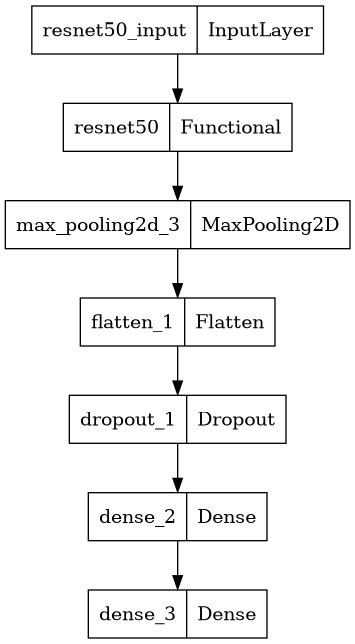

In [45]:
from keras.applications.resnet import ResNet50
from keras.models import Sequential
from keras.layers import MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

# Crear modelo ResNet50
model_resnet = Sequential()
model_resnet.add(ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
model_resnet.add(MaxPooling2D())
model_resnet.add(Flatten())
model_resnet.add(Dropout(0.3))
model_resnet.add(Dense(150, activation='relu'))
model_resnet.add(Dense(4, activation='softmax'))
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


# Guardar el modelo como imagen
plot_model(model_resnet, to_file='/kaggle/working/resnet.png')





In [ ]:
model_resnet.summary()

In [ ]:
# Entrenar el modelo
history_resnet = model_resnet.fit(x_train,y_train, 
                                  epochs=20, 
                                  validation_data=x_val, y_val 
                                  callbacks=callbacks)

--------

# Modelo predictivo

## Partición de datos

## Selección de atributos

## Estandarización / Normalización

## Modelado

## Evaluación del modelo

## Conclusión

## Almacenamiento de resultados